# PREDICCION DE PRECIOS DE AGUACATE EN EEUU





# Enunciado del Problema

- Los datos representan ventas semanales desde 2015 a 2018 a nivel de todos los EEUU. 
- Los datos provienen directamente de las cajas registradoras basados en ventas de aguacate variedad Hass. 
- El precio promedio de los aguacates reflejan el costo por unidad, aún cuando estos se vendan por bolsas. 
- Los códigos (Product Lookup codes ó PLU) en la tabla son solo de aguacates Hass.  No se incluyen otras variedades.

Columnas relevantes en el conjunto de datos:

- Date - la fecha de la observación
- AveragePrice - el precio promedio de una unidad
- type - convencional u orgánico
- year - el año
- Region - la ciudad o región de la observación
- Total Volume - número total de aguacates vendidos
- 4046 - número total de aguacates con PLU 4046 vendidos
- 4225 - número total de aguacates con PLU 4225 vendidos
- 4770 - número total de aguacates con PLU 4770 vendidos



# Importar las librerías

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pandas_profiling import ProfileReport
import torch
from torch import nn 
import torch.optim as optim


# Carga de datos

In [21]:
df = pd.read_csv('./aguacates_EEUU.csv', index_col = 'Unnamed: 0')


# Explorar el conjunto de datos  

In [22]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [23]:
profile = ProfileReport(df, title = 'Aguacates EEUU')


In [24]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Asegurar que estén los datos en orden cronológico

In [25]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df.sort_values(by="Date")

Date  AveragePrice  Total Volume        4046       4225       4770  \
51 2015-01-04          1.75      27365.89     9307.34    3844.81     615.28   
51 2015-01-04          1.49      17723.17     1189.35   15628.27       0.00   
51 2015-01-04          1.68       2896.72      161.68     206.96       0.00   
51 2015-01-04          1.52      54956.80     3013.04   35456.88    1561.70   
51 2015-01-04          1.64       1505.12        1.27    1129.50       0.00   
..        ...           ...           ...         ...        ...        ...   
0  2018-03-25          1.36     908202.13   142681.06  463136.28  174975.75   
0  2018-03-25          0.70    9010588.32  3999735.71  966589.50   30130.82   
0  2018-03-25          1.42     163496.70    29253.30    5080.04       0.00   
0  2018-03-25          1.70     190257.38    29644.09   70982.10       0.00   
0  2018-03-25          1.34    1774776.77    63905.98  908653.71     843.45   

    Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
51    13598.46    13061.10      537.36         0.00       organic  2015   
51      905.55      905.55        0.00         0.00       organic  2015   
51     2528.08     2528.08        0.00         0.00       organic  2015   
51    14925.18    11264.80     3660.38         0.00  conventional  2015   
51      374.35      186.67      187.68         0.00       organic  2015   
..         ...         ...         ...          ...           ...   ...   
0    127409.04   103579.41    22467.04      1362.59  conventional  2018   
0   4014132.29  3398569.92   546409.74     69152.63  conventional  2018   
0    129163.36   109052.26    20111.10         0.00       organic  2018   
0     89631.19    89424.11      207.08         0.00       organic  2018   
0    801373.63   774634.09    23833.93      2905.61  conventional  2018   

                region  
51           Southeast  
51             Chicago  
51  HarrisburgScranton  
51          Pittsburgh  
51               Boise  
..                 ...  
0              Chicago  
0         SouthCentral  
0         SouthCentral  
0           California  
0              NewYork  

[18249 rows x 13 columns]

# Realizar una gráfica de precios promedio vrs fecha

¿Cuál es la tendencia a nivel nacional?

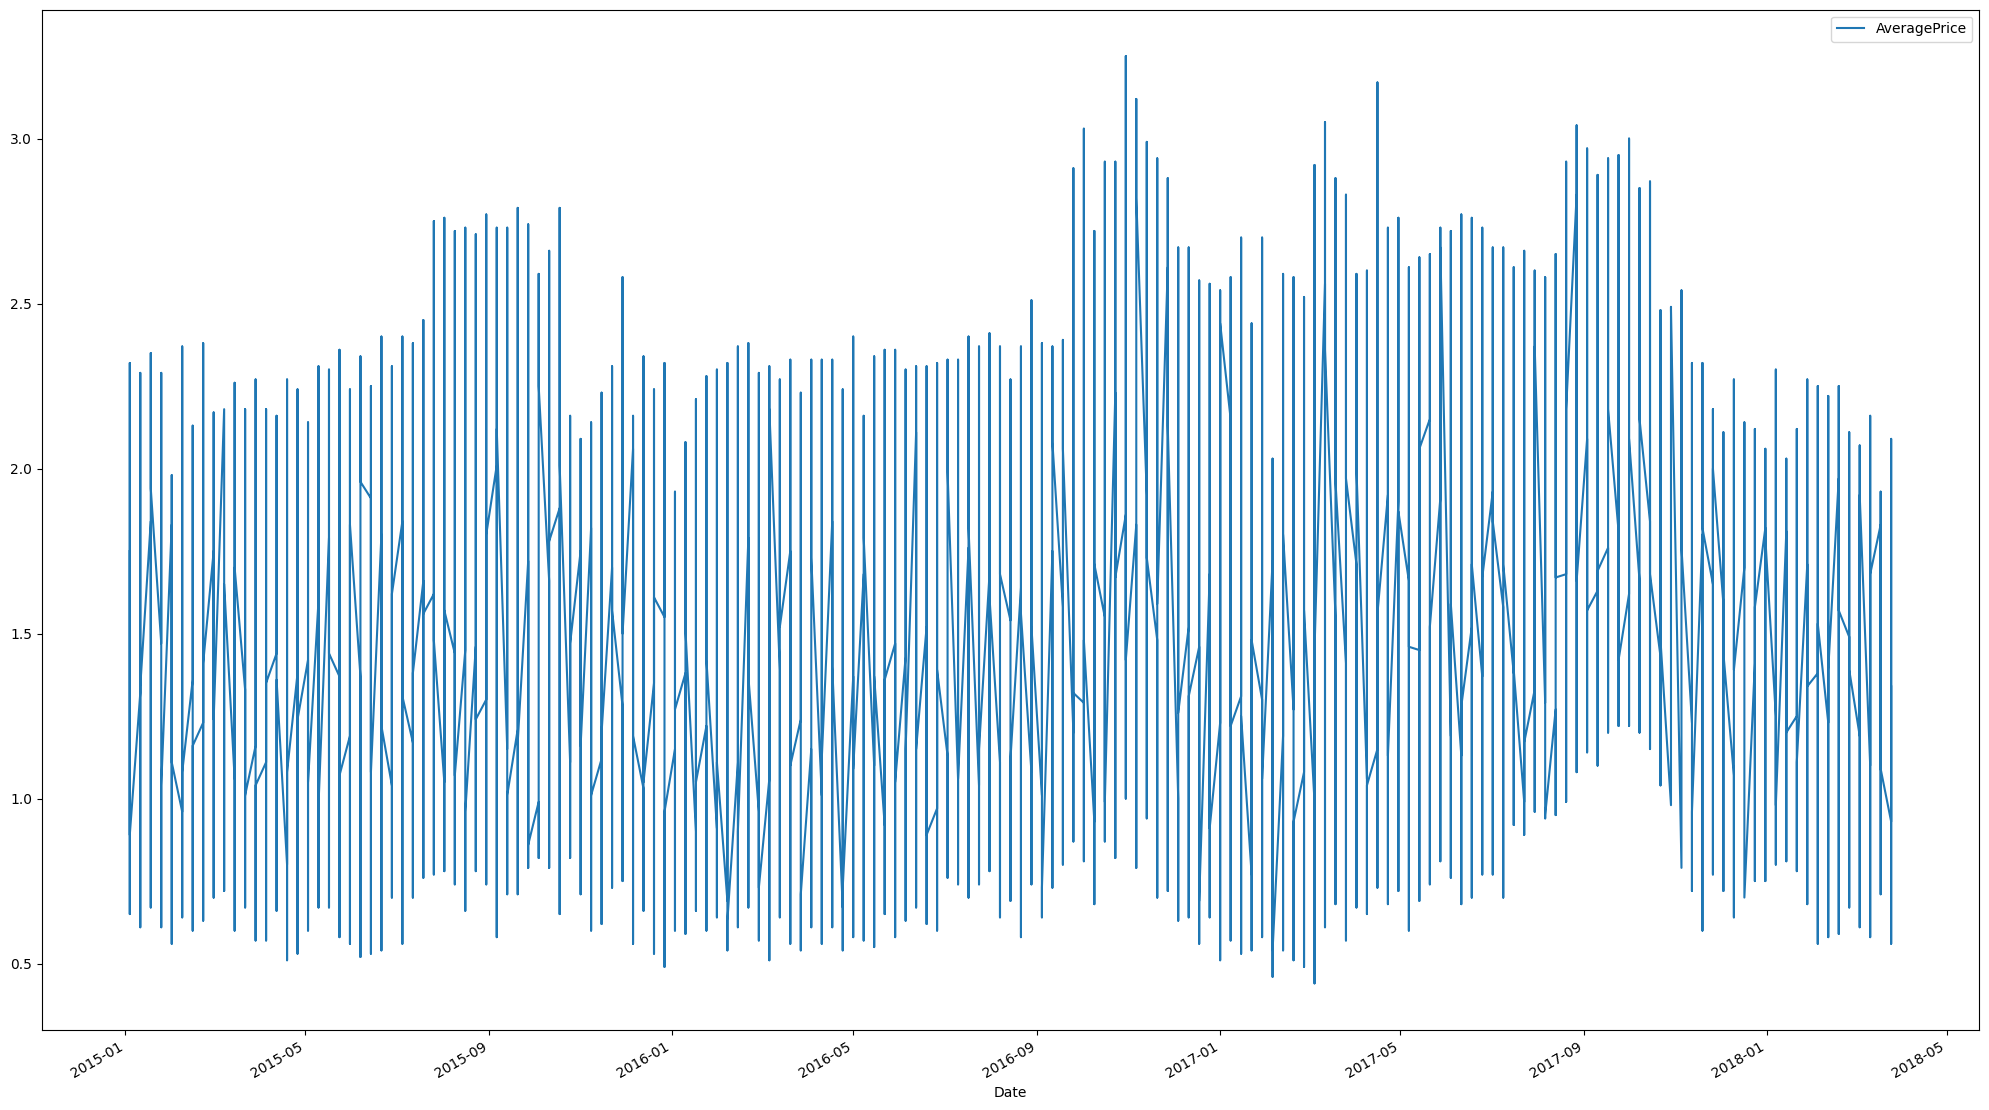

In [26]:
df.plot(x='Date', y='AveragePrice', kind="line", figsize=(25,15))
plt.show()

# Realizar una gráfica de barras para ver el número de regiones

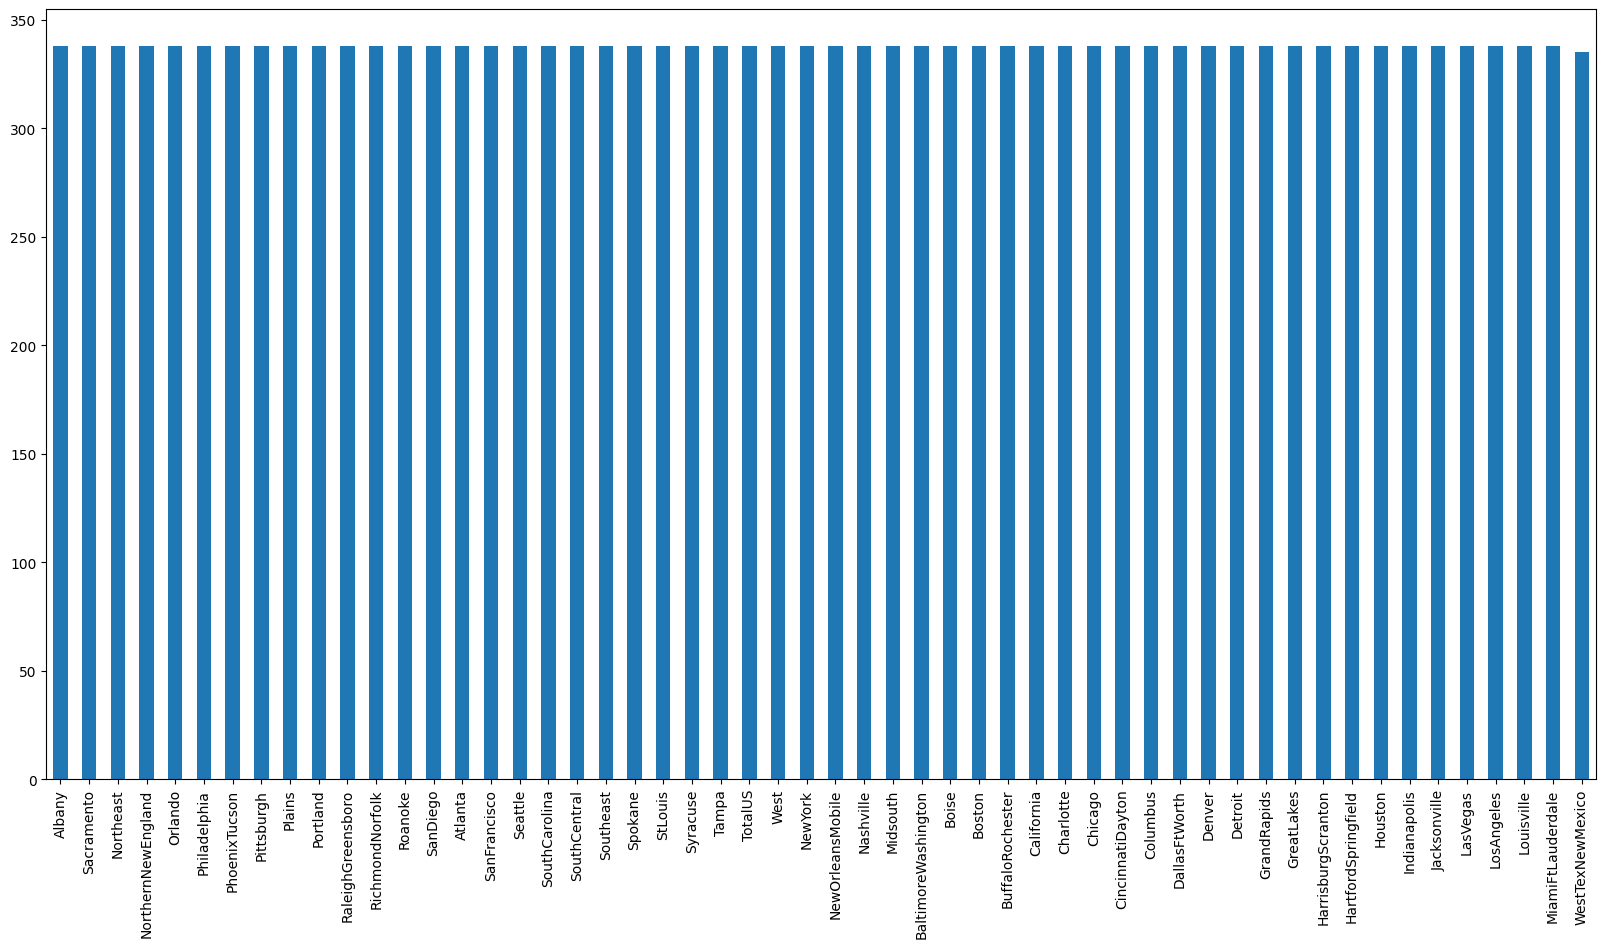

In [27]:
df_regions = df['region'].value_counts()
df_regions.plot.bar(figsize=(20,10))
plt.show()

# Realizar una gráfica de barras para ver de qué años se tiene información

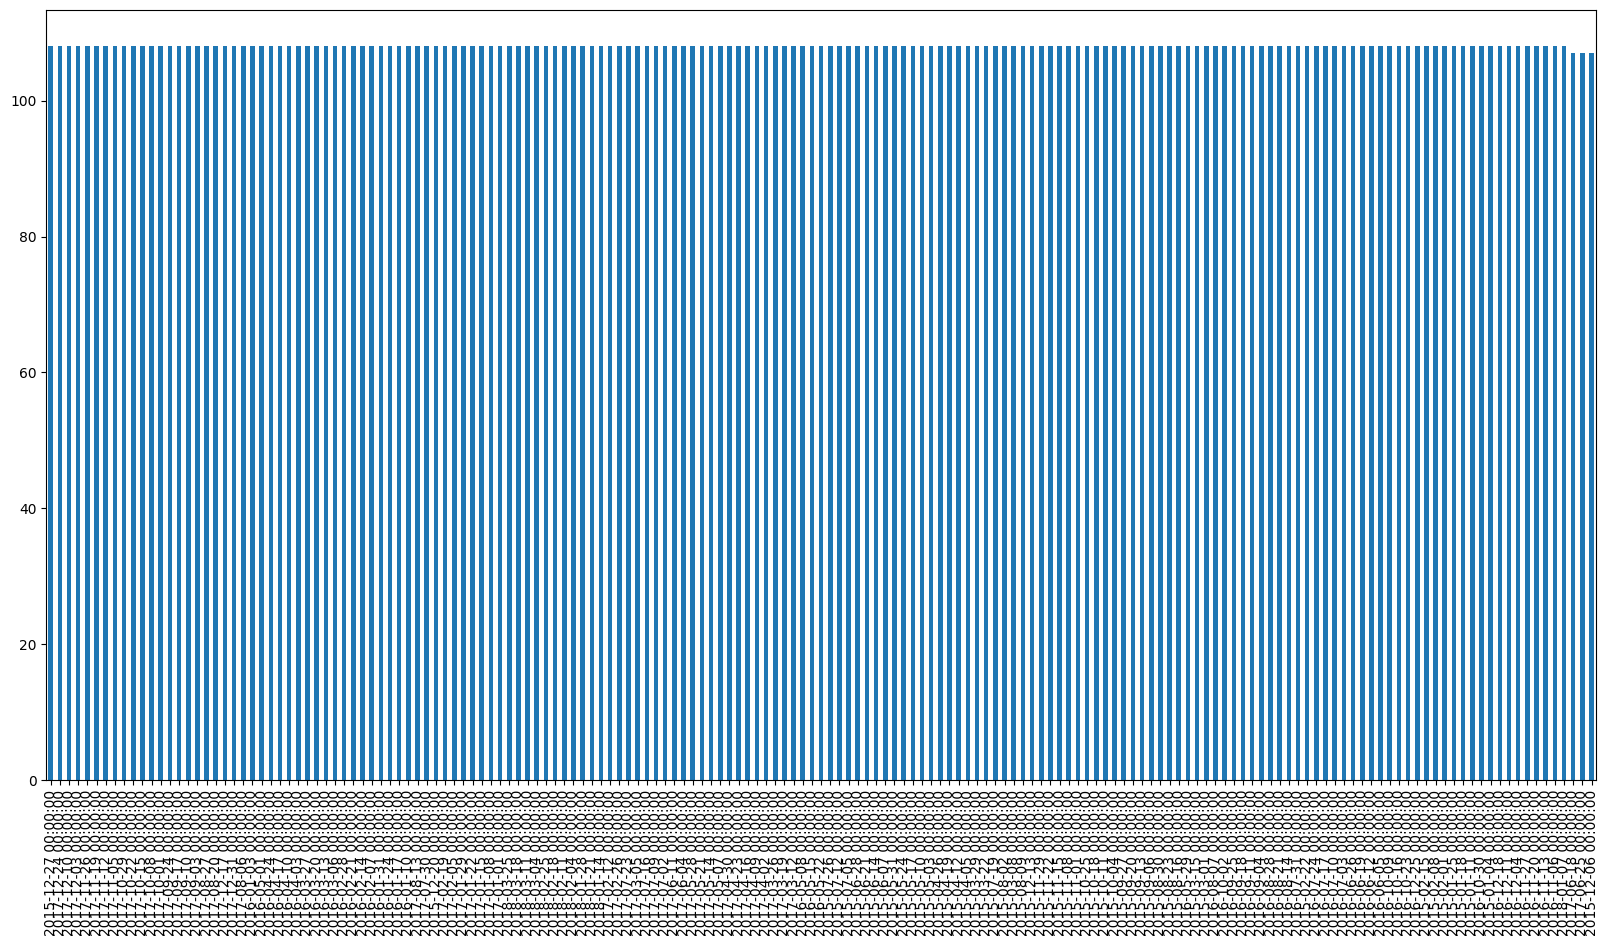

In [28]:
df_dates = df['Date'].value_counts()
df_dates.plot.bar(figsize=(20,10))
plt.show()

# Preparar los datos para que se acoplen a lo que requiere el modelo a utilizar

In [29]:
priceMax = df['AveragePrice'].mean()
priceMin = df['AveragePrice'].std()

priceTMax = df['AveragePrice'].mean()
priceTMin = df['Total Volume'].std()

yearMean = df['AveragePrice'].mean()
yearStd = df['Total Volume'].std()

df['AveragePrice'] = (df['AveragePrice']-priceMax)/priceMin
df['Total Volume'] = (df['Total Volume']-priceTMax)/priceTMin
df['year'] = (df['year']-yearMean)/yearStd

# Realizar predicciones

In [30]:
inputs = ['year','Total Volume']
x = torch.tensor(df[inputs].values,dtype=torch.float)

In [31]:
outputs = ['AveragePrice']
y = torch.tensor(df[outputs].values,dtype=torch.float)

# Creación y ajuste del modelo

In [32]:
model = nn.Sequential(
            nn.Linear(2,100),
            nn.ReLU(),
            nn.Linear(100,1)
        )

In [33]:
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


for epoch in range(3):
    totalLoss = 0
    for i in range(len(x)):
        ypred = model(x[i])
        loss = criterion(ypred, y[i])

        totalLoss+=loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print ("Total Loss: ", totalLoss)

Total Loss:  10168.080315861669
Total Loss:  10005.74377647456
Total Loss:  10005.74377647456


# Pronosticar hacia el futuro un año (365 días)

In [34]:
model.eval()

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [35]:
predictions=[]
actual=[]

for i in range(len(x)):
    prediction = model(x[i])                               
    prediction = prediction*priceMax+priceMin
    act = y[i]*priceMax+priceMin
    predictions.append(prediction.tolist())
    actual.append(act.item())

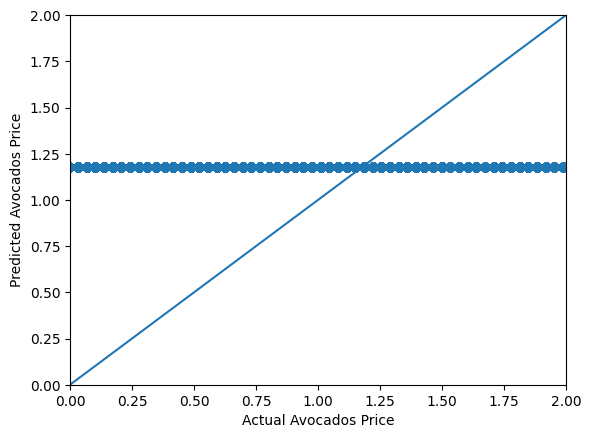

In [36]:
plt.scatter(actual, predictions)
plt.xlabel('Actual Avocados Price')
plt.ylabel('Predicted Avocados Price')
plt.plot([0,2], [0,2])
plt.xlim(0, 2)
plt.ylim(0, 2)

plt.show()

In [37]:
x1 = torch.tensor([2019, 55979],dtype=float)
y1 = model(x1.float())
y1 = y1*priceMax+priceMin

print ("Neural Network Predicts: ", y1.item())

Neural Network Predicts:  16.30924415588379


# Graficar los datos históricos y los del futuro

# Graficar los componentes del pronóstico

# PARTE 2

### Repetir el ejercicio pero solo con la región oeste "West" de los EEUU

### Leer el archivo de datos

### Por si acaso no están ordenadas las observaciones

# Graficar el precio promedio vs fecha

### ¿Es diferente la tendencia comparado a la tendencia nacional?

# Crear el modelo y ajustarlo con los datos

### Preparar los datos para que sean aceptados por el modelo a usar

# Pronosticar al futuro un año (365 días)

# Graficar datos históricos y pronosticados